<a href="https://colab.research.google.com/github/renevaldez/ReneValdez_RepositorioInteligenciaArtificial/blob/main/ACTIVIDAD_FUNDAMENTAL_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 5: Procesamiento de conjuntos de datos en Python
*   Jonathan Gael Posada Licón
*   Juan Emiliano Morales Silva
*   Rene Gutierrez Valdez
*   Guillermo Rodríguez González
*   Andres Suárez Galván






In [ ]:
# CARGAR LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/robot_sensors.csv')

In [ ]:
#Imprimimos los primeros 10 datos del dataset
print(df.head(10))

   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246
5           5       24.039507         32.939168         31.390974
6           6       15.227525         34.613828         26.746098
7           7       87.955853         42.459783         31.650658
8           8       64.100351         12.483400         20.980492
9           9       73.726532         24.471248         27.313568


In [ ]:
#Eliminamos las filas con valores nulos y comprobamos
df = df.dropna()

In [ ]:
print(df.isnull().sum())

Tiempo (s)          0
Distancia (cm)      0
Velocidad (cm/s)    0
Temperatura (°C)    0
dtype: int64


In [ ]:
df = df[df[ "Velocidad (cm/s)"] >=0]
df_DistanciaM= df[df[ "Distancia (cm)"] >30]
df_Velocidad= df[df[ "Velocidad (cm/s)"] >5]


In [ ]:
scaler = MinMaxScaler()
columnas_numericas = ['Tiempo (s)', 'Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']

df_normalizado = df.copy()
df_normalizado[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

print("\nDatos normalizados (primeras filas):")
print(df_normalizado.head(10))


Datos normalizados (primeras filas):
   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0    0.000000        0.371735          0.182609          0.262269
1    0.001001        0.950755          0.540740          0.247509
2    0.002002        0.730954          0.873049          0.908233
3    0.003003        0.596960          0.731791          0.250082
4    0.004004        0.152134          0.806411          0.272535
5    0.005005        0.152110          0.658069          0.761054
6    0.006006        0.053716          0.691690          0.450716
7    0.007007        0.865799          0.849208          0.778404
8    0.008008        0.599429          0.247391          0.065498
9    0.009009        0.706915          0.488064          0.488630


In [ ]:
Variables=['Tiempo (s)','Distancia (cm)','Velocidad (cm/s)','Temperatura (°C)']
for datos in Variables:
    df_normalizado[datos]=(df_normalizado[datos]-df_normalizado[datos].min())/(df_normalizado[datos].max()-df_normalizado[datos].min())

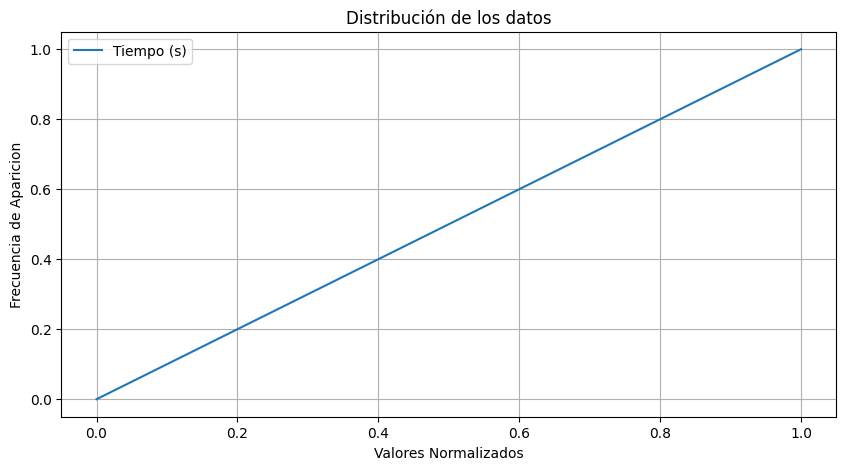

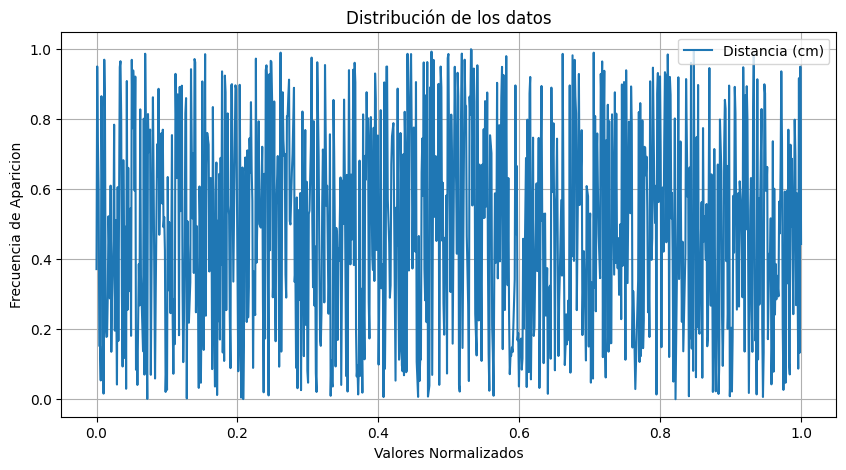

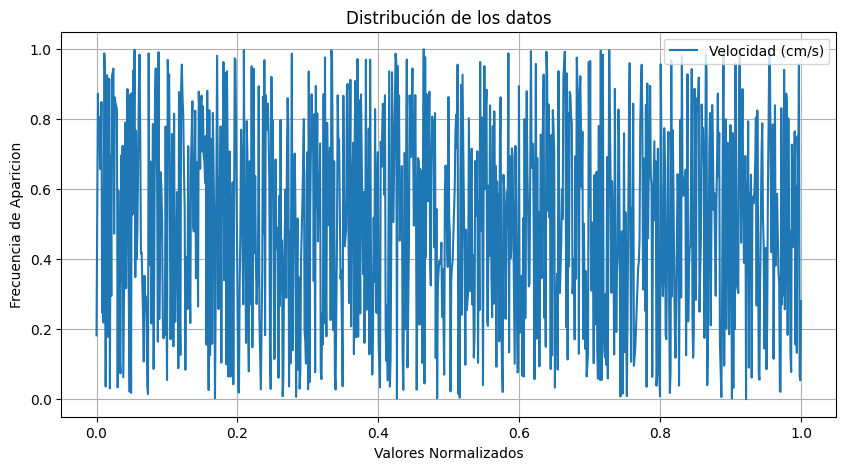

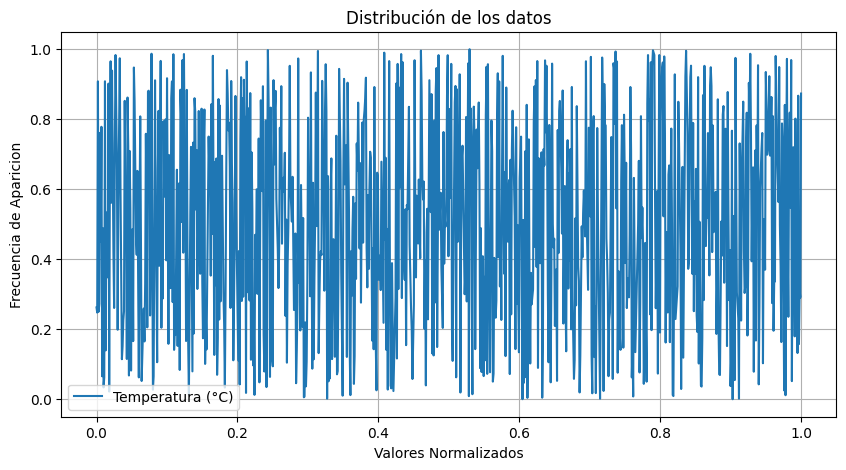

In [ ]:
for datos in Variables:
    plt.figure(figsize=(10,5))
    plt.plot(df_normalizado['Tiempo (s)'],df_normalizado[datos],label=datos)
    plt.title('Distribución de los datos')
    plt.xlabel('Valores Normalizados')
    plt.ylabel('Frecuencia de Aparicion')
    plt.legend()
    plt.grid(True)
    plt.show()